# Gradient curves


# Graphic with color gradient in python

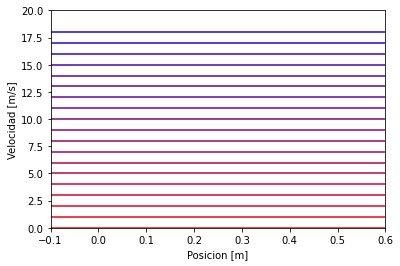

In [1]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(0, 19):
    plt.plot((-0.1, 0.6), (i, i), color=((20 - i) / 20.0, 0, i / 20.0))
plt.ylim([0, 20])
plt.xlim([-0.1, 0.6])
plt.xlabel("Posicion [m]")
plt.ylabel("Velocidad [m/s]")
plt.show()

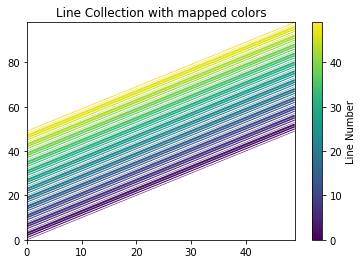

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

N = 50
x = np.arange(N)
# Here are many sets of y to plot vs x
ys = [x + i for i in x]

# We need to set the plot limits, they will not autoscale
ax = plt.axes()
ax.set_xlim((np.amin(x), np.amax(x)))
ax.set_ylim((np.amin(np.amin(ys)), np.amax(np.amax(ys))))

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See matplotlib.collections.LineCollection for more information

# Make a sequence of x,y pairs
line_segments = LineCollection(
    [list(zip(x, y)) for y in ys], linewidths=(0.5, 1, 1.5, 2), linestyles="solid"
)
line_segments.set_array(x)
ax.add_collection(line_segments)
fig = plt.gcf()
axcb = fig.colorbar(line_segments)
axcb.set_label("Line Number")
ax.set_title("Line Collection with mapped colors")
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

# Gradient Descent

In [16]:
import numpy as np
import random

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

2D Example:

Problem: minimize the function: f(x) = 5x + x².

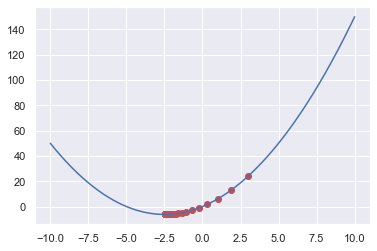

min: -2.4792215874753736


In [17]:
def pp_plt(cost, thetas=None):

    x = np.linspace(-10, 10, 100 * 10 * 2)
    y = [cost(i) for i in x]

    plt.plot(x, y)

    if not thetas == None:

        for theta in thetas:
            plt.scatter(theta, cost(theta), color="r")

    plt.show()


theta = 3
learning_rate = 0.1

cost = lambda x: 5 * x + x**2
derivative = lambda x: 5 + 2 * (x**1)

history = [theta]
for iteration in range(25):
    theta = theta - (learning_rate * derivative(theta))
    history.append(theta)

pp_plt(cost, history)
print("min:", theta)

using the 1st derivative (slope) of ( 5x + x² ), combined with the learning rate, we gradually converge towards the global minimum.

3D Example:

Problem: minimize the function: f(a, b) = a² + b², constrained between -10–10 for both a and b.

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def pp_plt3(history):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    x1 = np.linspace(-10, 10, 100 * 10)
    x2 = np.linspace(-10, 10, 100 * 10)

    X, Y = np.meshgrid(x1, x2)
    Z = X**2 + Y**2
    ax.contour3D(X, Y, Z, 50, cmap="binary")

    Xs = np.matrix(history)[:, 0].T.tolist()[0]
    Ys = np.matrix(history)[:, 1].T.tolist()[0]
    ax.scatter3D(Xs, Ys, [np.array(Xs) ** 2 + np.array(Ys) ** 2])

In [20]:
theta = np.array([-10, -10])
y = np.sum(np.square(theta))

theta, y

(array([-10, -10]), 200)

In [21]:
theta = np.array([-10, -10])
y = np.sum(np.square(theta))

theta, y

learning_rate = 0.01
cost = lambda X: np.sum(np.square(X))

derivative_x1 = lambda X: 2 * X[0] + 0
derivative_x2 = lambda X: 0 + 2 * X[1]

history = [theta]
for iteration in range(10000):

    derivatives = np.array(
        [learning_rate * derivative_x1(theta), learning_rate * derivative_x2(theta)]
    )

    theta = theta - derivatives
    history.append(theta)

min: [-1.82287515e-87 -1.82287515e-87]


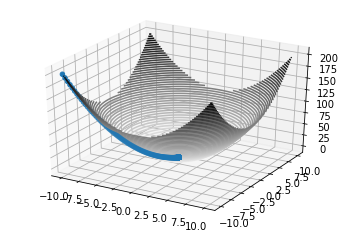

In [22]:
sns.reset_orig()

pp_plt3(np.matrix(history))
print("min:", theta)

In [23]:
# y = mx + b

# 1/m sum ( y - ( mx + b ) )^2

## partial by m = 2/m * (y - (mx + b) ) * -x
## partial by b = 2/m * (y - (mx + b) ) * -1


def cost(m, b, X, y):
    return np.mean(np.square(y - (m * X + b)))

In [24]:
def pp_plt(X, y, b, m, iteration):

    _ = plt.title(iteration)
    _ = plt.scatter(X, y)

    # regression stats,
    _ = plt.plot(X, X * m + b, color="r")

    plt.show()

    ## print stats,
    print("m:", m_gradient, "b:", b_gradient, "cost:", cost(m, b, X, y))

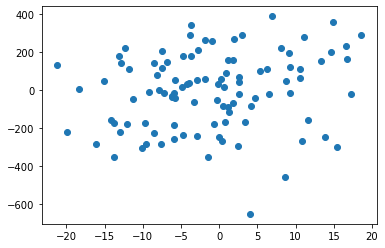

In [25]:
X, y = datasets.make_regression()
X = np.sum(X, axis=1)

plt.scatter(X, y)
plt.show()

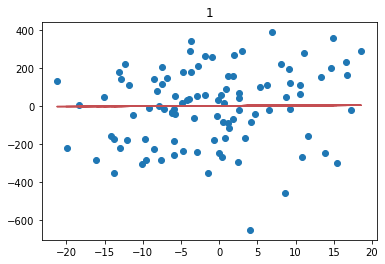

m: 0.1802696888767692 b: 0.019475241487624584 cost: 39338.96200924034


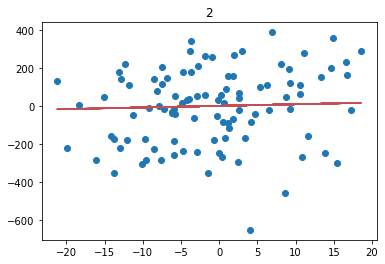

m: 0.8451907847871309 b: 0.0037900631797473314 cost: 38933.207153721945


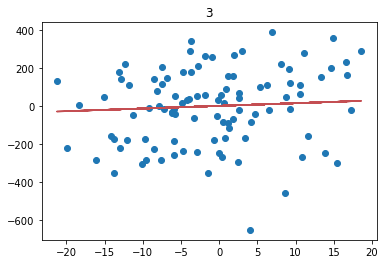

m: 1.4000237964606883 b: -0.010455759086527412 cost: 38650.65762634355


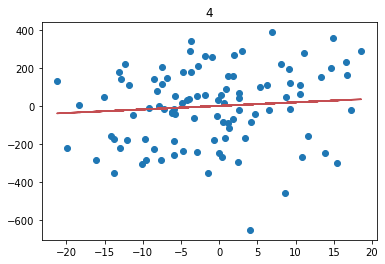

m: 1.8629930764150424 b: -0.02349821806891382 cost: 38453.89828448144


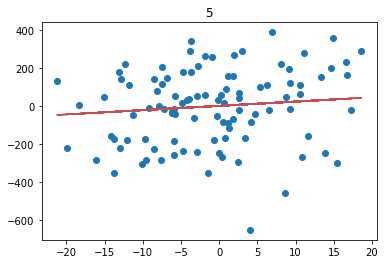

m: 2.2493060612611613 b: -0.03553424405478354 cost: 38316.876278851894


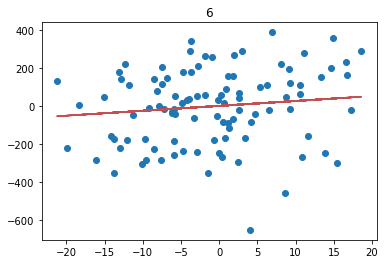

m: 2.5716527013212556 b: -0.04672817137479715 cost: 38221.45053312019


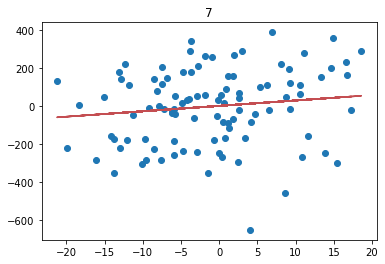

m: 2.840622213118462 b: -0.057217134429827204 cost: 38154.98908335756


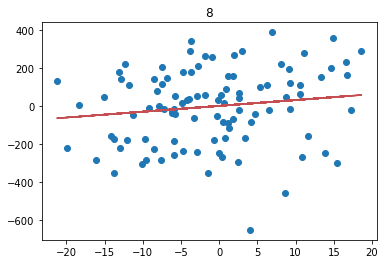

m: 3.065050841366608 b: -0.06711557044286323 cost: 38108.69606150141


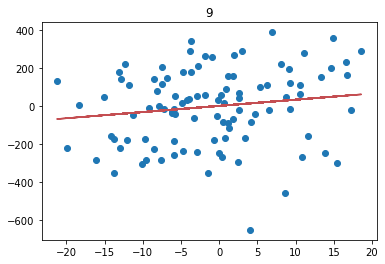

m: 3.252312051361416 b: -0.0765189768114162 cost: 38076.446743298045


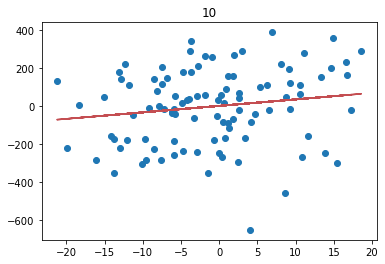

m: 3.408558682023081 b: -0.08550704645616797 cost: 38053.97637084972


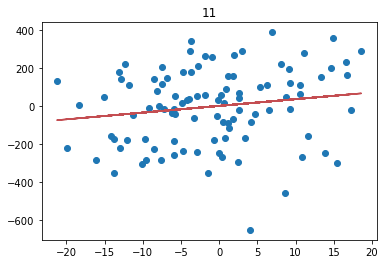

m: 3.5389250121730176 b: -0.09414628413429656 cost: 38038.31531489764


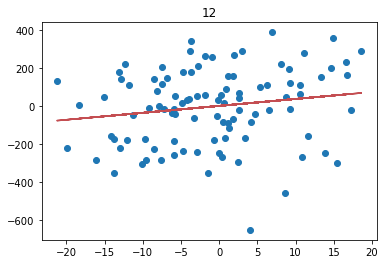

m: 3.647695376132333 b: -0.10249218964019517 cost: 38027.39576797493


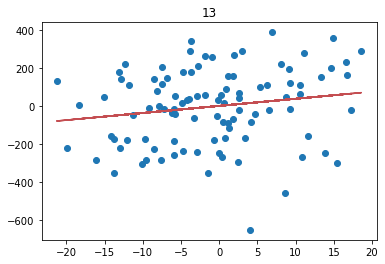

m: 3.738444866171077 b: -0.11059107959238915 cost: 38019.7778776458


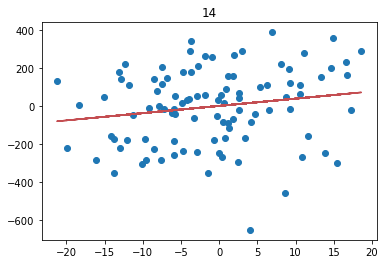

m: 3.8141567426375813 b: -0.11848160763621252 cost: 38014.45904806424


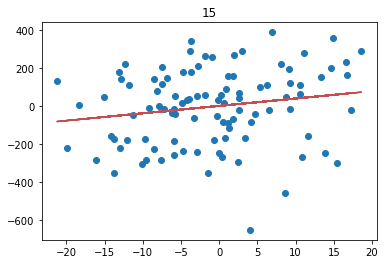

m: 3.8773204076507777 b: -0.1261960329874353 cost: 38010.74115315673


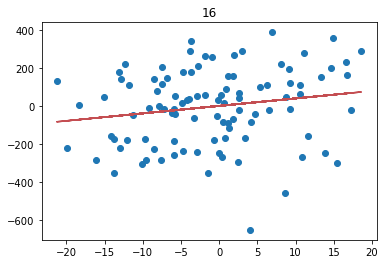

m: 3.93001315992357 b: -0.13376127897726067 cost: 38008.13807472942


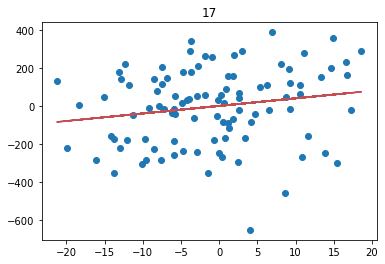

m: 3.973968415639139 b: -0.14119981636251686 cost: 38006.31131955886


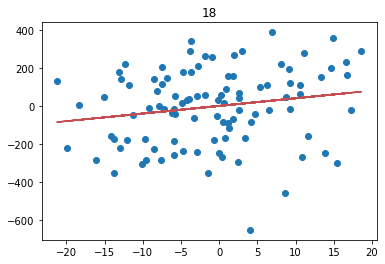

m: 4.010632635831761 b: -0.14853040040995702 cost: 38005.02518839298


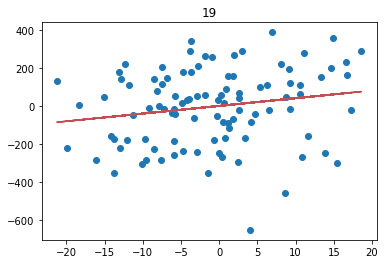

m: 4.041212829832413 b: -0.1557686859613548 cost: 38004.11555930548


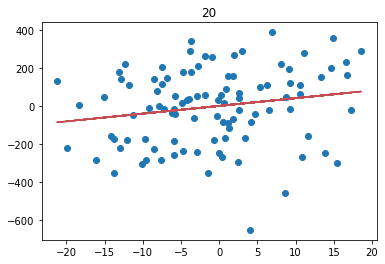

m: 4.066716194846641 b: -0.16292774067883295 cost: 38003.468150973866


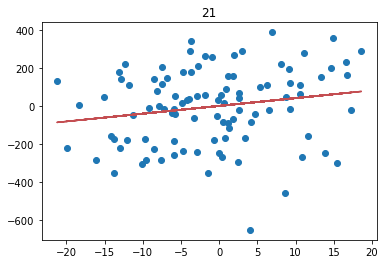

m: 4.087983193473732 b: -0.17001847332598533 cost: 38003.003387001605


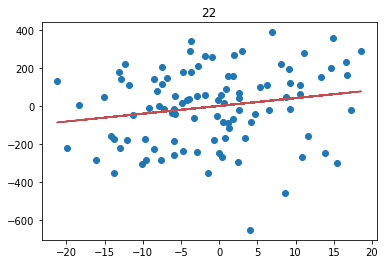

m: 4.105715155470768 b: -0.17704999115003034 cost: 38002.6658566687


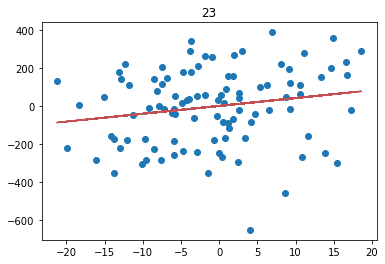

m: 4.120497310235028 b: -0.18402989810183115 cost: 38002.41697625906


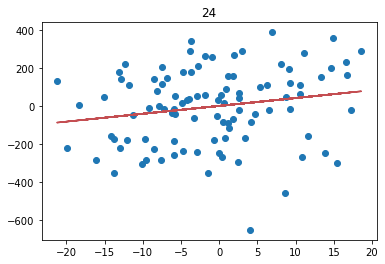

m: 4.132818006417811 b: -0.1909645436876655 cost: 38002.229879008584


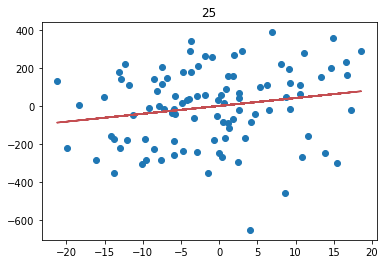

m: 4.143084749863757 b: -0.19785923062531854 cost: 38002.085856882164


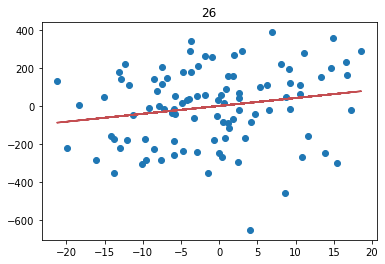

m: 4.151637586579957 b: -0.20471838812415893 cost: 38001.971882917984


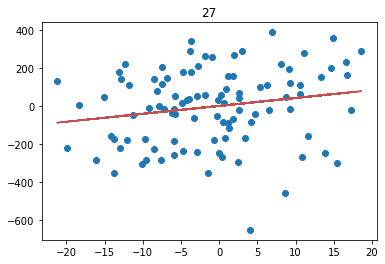

m: 4.15876027024683 b: -0.21154571647991013 cost: 38001.878885990496


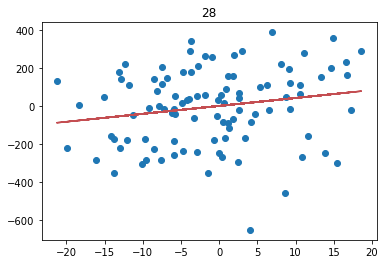

m: 4.164689581024612 b: -0.2183443077327719 cost: 38001.80054949622


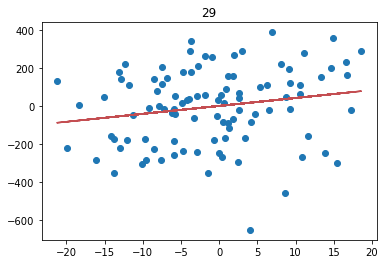

m: 4.1696231016957075 b: -0.22511674635143852 cost: 38001.73247485664


In [26]:
n = len(y)
learning_rate = 0.001

np.random.seed(11)

## initial gradient positions,
m_gradient = np.random.rand()
b_gradient = np.random.rand()

pp_plt(X, y, b_gradient, m_gradient, 1)

for iteration in range(2, 30):

    new_m_gradient = 0
    new_b_gradient = 0

    for i in range(n):
        x_i = X[i]
        y_i = y[i]

        y_hat = m_gradient * x_i + b_gradient
        new_m_gradient += (2 / n) * (y_i - y_hat) * (-1) * x_i
        new_b_gradient += (2 / n) * (y_i - y_hat) * (-1)

    b_gradient = b_gradient - (learning_rate * new_b_gradient)
    m_gradient = m_gradient - (learning_rate * new_m_gradient)

    pp_plt(X, y, b_gradient, m_gradient, iteration)

# How to visualize Gradient Descent using Contour plot in Python

In [27]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)

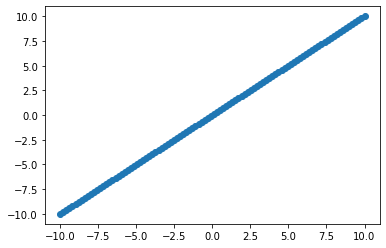

In [28]:
plt.scatter(x1, x2)
plt.show()

In [29]:
a = np.array((1, 2, 3))
a1, a2 = np.meshgrid(a, a)

In [30]:
a1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [31]:
a2

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [32]:
X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(np.square(X1) + np.square(X2))

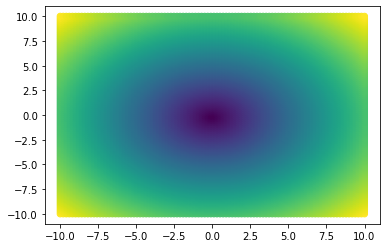

In [33]:
cm = plt.cm.get_cmap("viridis")
plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

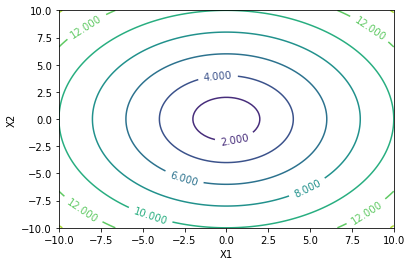

In [34]:
cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

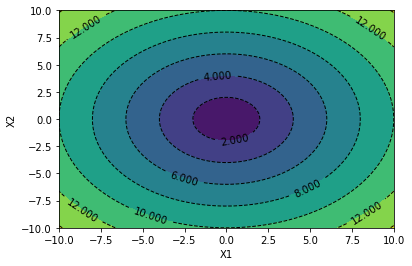

In [35]:
cp = plt.contour(X1, X2, Y, colors="black", linestyles="dashed", linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(
    X1,
    X2,
    Y,
)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

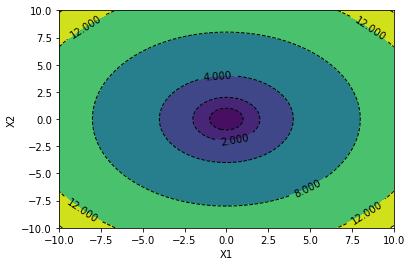

In [36]:
levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
cp = plt.contour(X1, X2, Y, levels, colors="black", linestyles="dashed", linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, levels)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Gradient Descent Algorithm:

In [38]:
import pandas as pd

data = pd.read_csv("Advertising.csv")
y = data["sales"]
X = np.column_stack((data["TV"], data["radio"]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = y - y_hat
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [40]:
w = np.array((-40, -40))
alpha = 0.1
tolerance = 1e-3

old_w = []
errors = []

# Gradient Descent Loop:

In [41]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient

    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)

    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Gradient Descent has converged")
        break

    iterations += 1
    w = new_w

print("w =", w)

Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged
w = [3.91359776 2.77964408]


In [42]:
w

array([3.91359776, 2.77964408])

In [43]:
all_ws = np.array(old_w)

# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)

levels = np.sort(np.array(errors))

# Draw the Contour plot:

# Prepare Axis (w0, w1)

In [44]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [45]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1, value2))
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

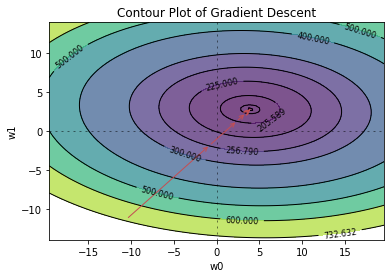

In [46]:
plt.contourf(w0, w1, mse_vals, levels, alpha=0.7)
plt.axhline(0, color="black", alpha=0.5, dashes=[2, 4], linewidth=1)
plt.axvline(0, color="black", alpha=0.5, dashes=[2, 4], linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate(
        "",
        xy=all_ws[i + 1, :],
        xytext=all_ws[i, :],
        arrowprops={"arrowstyle": "->", "color": "r", "lw": 1},
        va="center",
        ha="center",
    )

CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1, colors="black")
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

# Gradient Descent

In [47]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(["ggplot"])

In [48]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

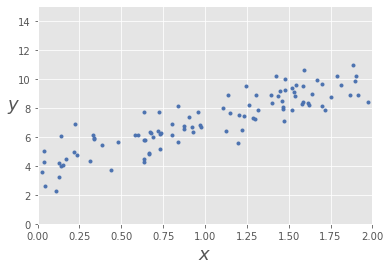

In [49]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0, 2, 0, 15])

# Analytical way of Linear Regression

In [50]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.9675855 ]
 [3.08156827]]


This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data 

In [51]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9675855 ],
       [10.13072204]])

Let's plot prediction line with calculated:theta 

(0.0, 2.0, 0.0, 15.0)

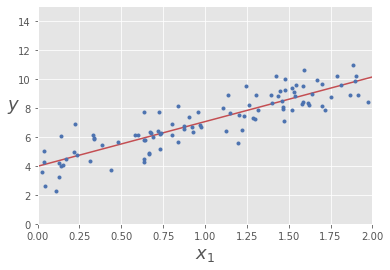

In [52]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

# Gradient Descent
Cost Function & Gradients

In [53]:
def cal_cost(theta, X, y):
    """

    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))

    where:
        j is the no of features
    """

    m = len(y)

    predictions = X.dot(theta)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))
    return cost

In [54]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    """
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):

        prediction = np.dot(X, theta)

        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [55]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)


print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

Theta0:          3.580,
Theta1:          3.408
Final cost/MSE:  4391.116


Let's plot the cost history over iterations 

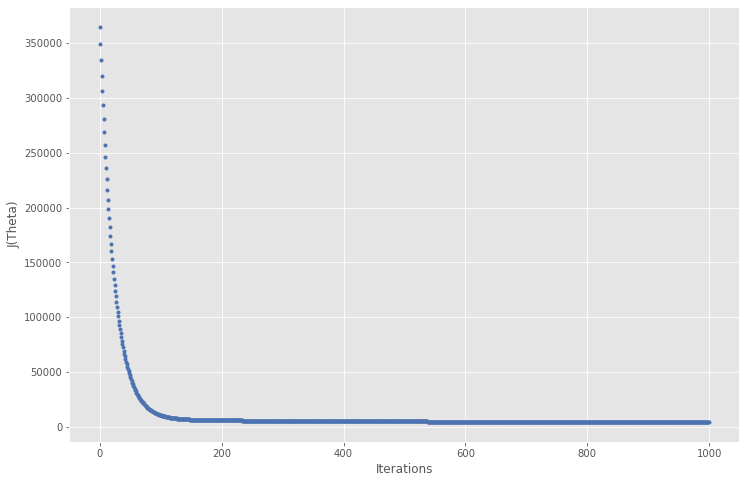

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel("J(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(n_iter), cost_history, "b.")

After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve 

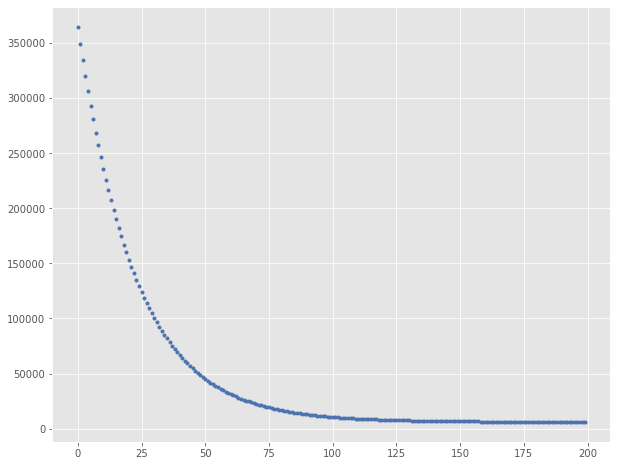

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = ax.plot(range(200), cost_history[:200], "b.")



It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much
It would be great to see the effect of different learning rates and iterations together
Let us build a function which can show the effects together and also show how gradient decent actually is working

In [58]:
def plot_GD(n_iter, lr, ax, ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    _ = ax.plot(X, y, "b.")
    theta = np.random.randn(2, 1)

    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if i % 25 == 0:
            _ = ax.plot(X, pred, "r-", alpha=tr)
            if tr < 0.8:
                tr = tr + 0.2
    if not ax1 == None:
        _ = ax1.plot(range(n_iter), cost_history, "b.")

# Plot the graphs for different iterations and learning rates combination

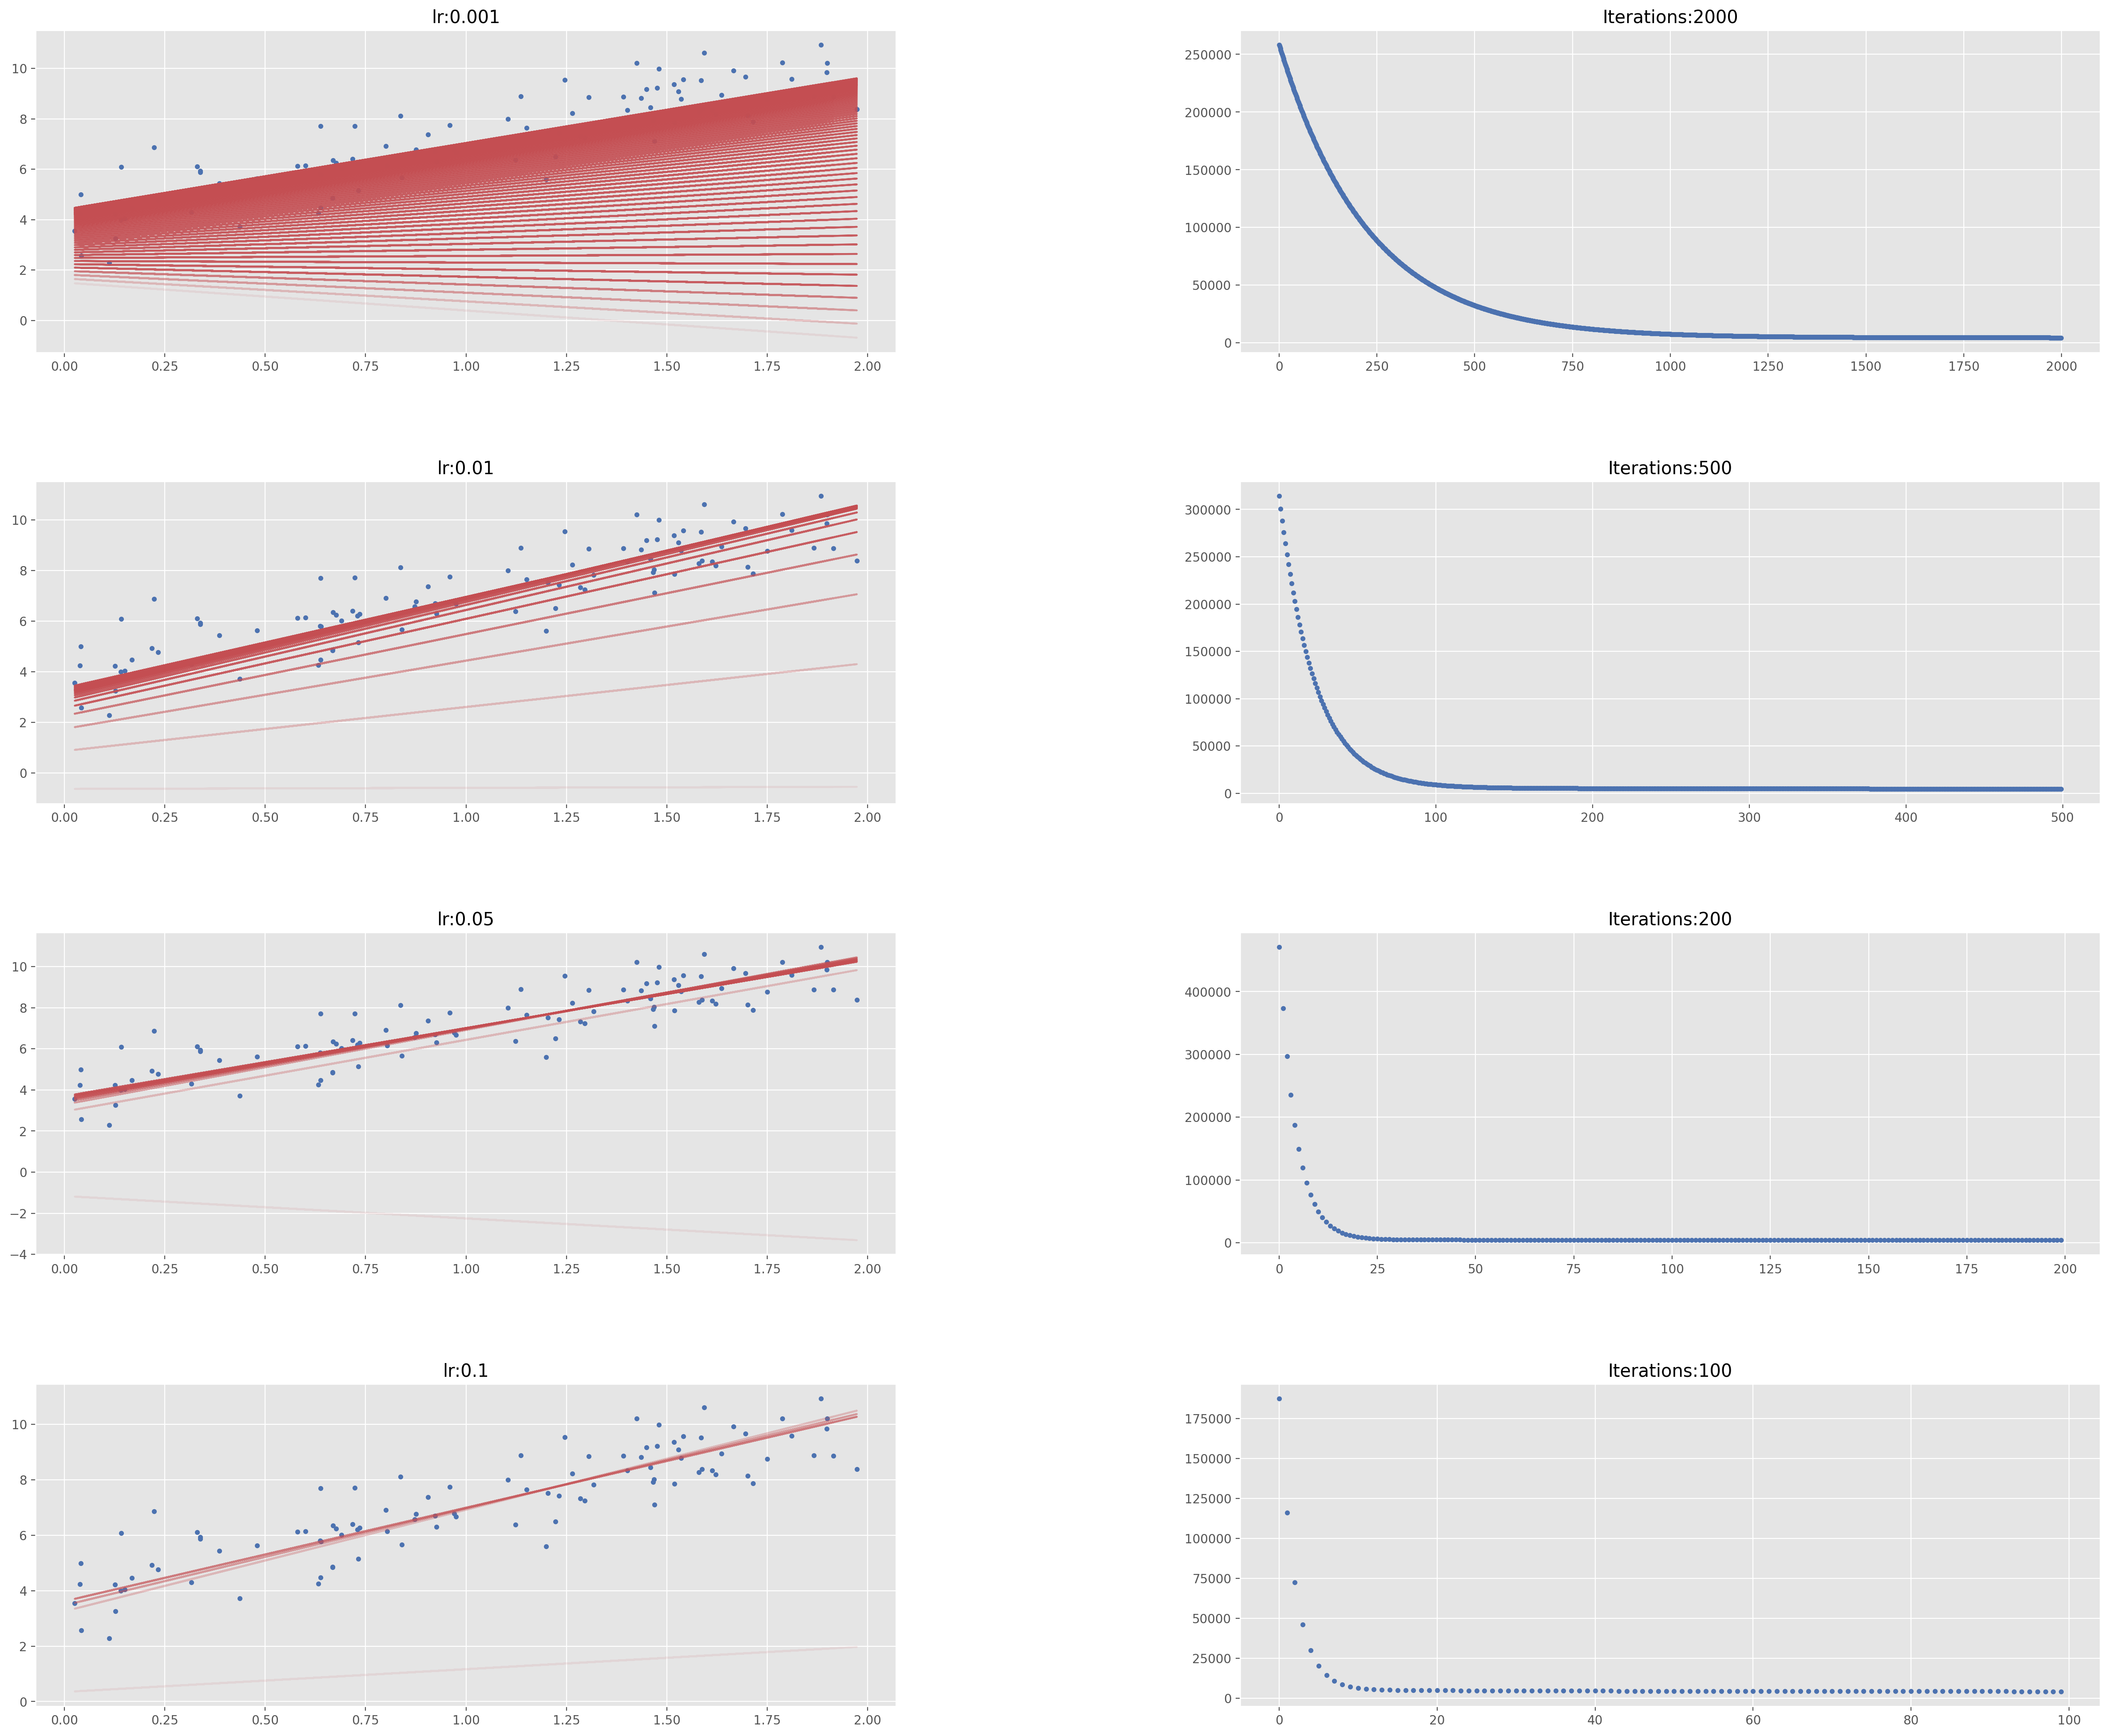

In [59]:
fig = plt.figure(figsize=(30, 25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4, 2, count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

# You can always plot Indiviual graphs to zoom in

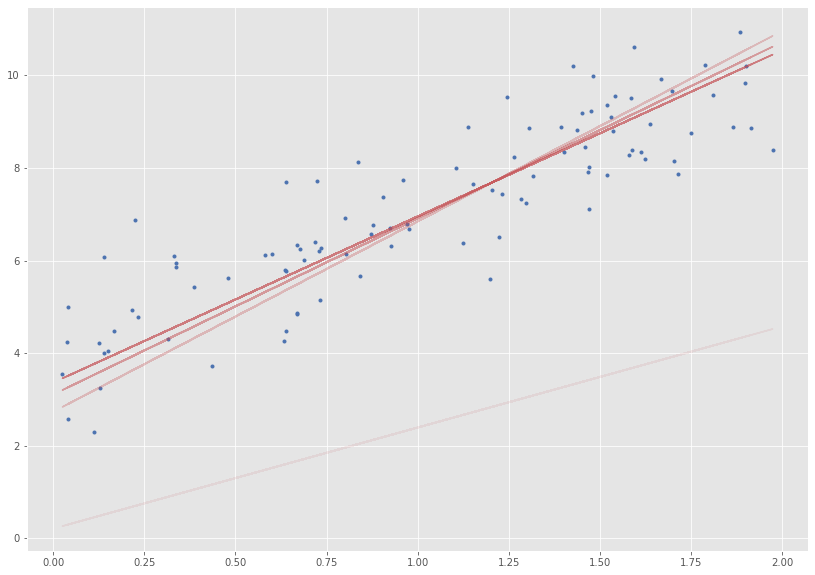

In [60]:
_, ax = plt.subplots(figsize=(14, 10))
plot_GD(100, 0.1, ax)

# Stochastic Gradient Descent

In [61]:
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)

            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost

    return theta, cost_history

In [62]:
lr = 0.5
n_iter = 50

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history = stocashtic_gradient_descent(X_b, y, theta, lr, n_iter)


print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

Theta0:          3.841,
Theta1:          3.166
Final cost/MSE:  43.040


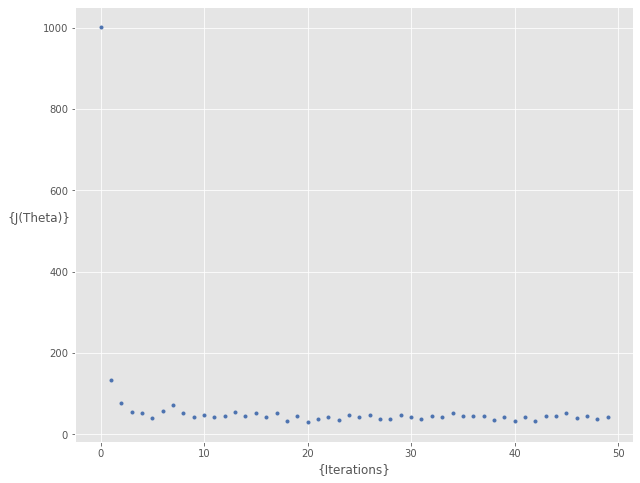

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)

_ = ax.plot(range(n_iter), cost_history, "b.")

# Gradient of Lines

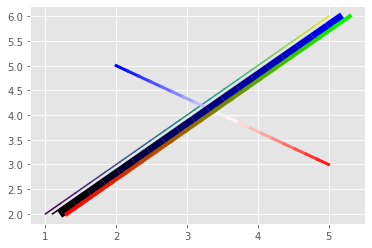

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap


def plot_gradient_hack(p0, p1, npts=20, cmap=None, **kw):
    """
    Draw a gradient between p0 and p1 using a colormap
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    x_1, y_1 = p0
    x_2, y_2 = p1

    X = np.linspace(x_1, x_2, npts)
    Xs = X[:-1]
    Xf = X[1:]
    Xpairs = zip(Xs, Xf)

    Y = np.linspace(y_1, y_2, npts)
    Ys = Y[:-1]
    Yf = Y[1:]
    Ypairs = zip(Ys, Yf)

    C = np.linspace(0, 1, npts)
    cmap = plt.get_cmap(cmap)
    # the simplest way of doing this is to just do the following:
    for x, y, c in zip(Xpairs, Ypairs, C):
        plt.plot(x, y, "-", c=cmap(c), **kw)

    # But for cases when that  will be too slow, you can make this go faster,
    # follow along with this example:
    # http://matplotlib.org/examples/pylab_examples/line_collection2.html


def plot_gradient_rbg_pairs(p0, p1, rgb0, rgb1, **kw):
    """Form the gradient from RGB values at each point
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    cmap = LinearSegmentedColormap.from_list("tmp", (rgb0, rgb1))
    plot_gradient_hack(p0, p1, cmap=cmap, **kw)


# plot gradient that just spans the full colormap
plot_gradient_hack((1, 2), (5, 6))

# we can specify the colormap, and set some properties for the plot
plot_gradient_hack((2, 5), (5, 3), cmap="bwr", linewidth=3.0)

# We also have a simple wrapper to specify the two rgb points to interpolate
# the gradient between
plot_gradient_rbg_pairs((1.1, 2), (5.1, 6), (0, 0, 0), (1, 1, 1))  # black to white
plot_gradient_rbg_pairs(
    (1.2, 2),
    (5.2, 6),
    (0, 0, 0),
    (0, 0, 1),  # black to blue
    linestyle="--",
    linewidth=9,
)
plot_gradient_rbg_pairs(
    (1.3, 2), (5.3, 6), (1, 0, 0), (0, 1, 0), linewidth=4  # red to green
)

plt.show()

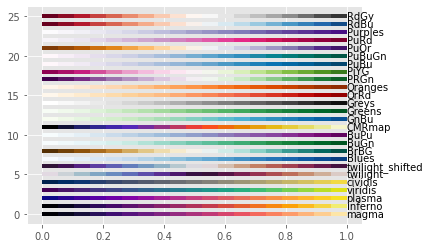

In [67]:
# we can use this gradient plot to display all colormaps on one plot easily
plt.figure()
with matplotlib.rc_context({"lines.solid_capstyle": "butt"}):
    # the default projecting capstyle looks kind of ugly. rc_context was
    # introduced in matpltolib 1.2.0, if you are running a version older than
    # that, you can ignore this line and remove one level of indentation from
    # the for loop
    for i, map_name in enumerate(plt.cm.cmap_d):
        plot_gradient_hack((0, i), (1, i), cmap=map_name, linewidth=4)
        plt.text(1, i, map_name, va="center")
        # comment out this last line to plot all ~140 colormaps
        if i == 25:
            break
plt.show()

# Gradient of a Line

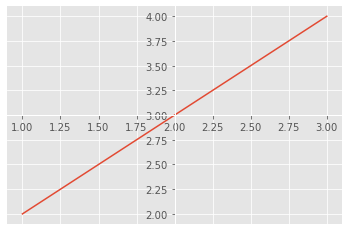

In [71]:
import matplotlib.pyplot as plt

point1 = [1, 2]

point2 = [3, 4]


x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
plt.plot(x_values, y_values)
plt.show()

gradient of a line = x/y

In [75]:
x = point1[0] - point2[0]
y = point1[1] - point2[1]

In [79]:
z = y / x
print("Gradient of the line is ", z)

Gradient of the line is  1.0
